In [7]:
import tensorflow_probability as tfp
import numpy as np
import tensorflow as tf
import matplotlib.ticker as ticker

import time
from tqdm import tqdm
import pickle

from matplotlib.ticker import MaxNLocator

import pandas as pd
np.set_printoptions(suppress=True,precision=3)
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 

import sys

#from tensorflow_probability import distributions as tfd
#from tensorflow_probability import positive_semidefinite_kernels as tfk
%matplotlib inline


In [19]:

        
samples = np.zeros((250,25*2))

for i in range(1):
    with open ('../data/hmc_samples_p_' + str(i) + '.npy', 'rb') as fp:
        hmcs = pickle.load(fp)
    
    samples[:,0:25] = hmcs[2]
    samples[:,25:] = hmcs[6]


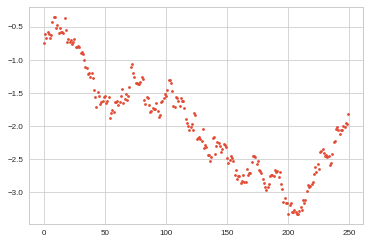

In [20]:
plt.plot(hmcs[2][:,5],'.')

In [29]:
num_runs=1

num_samples=25
samples = np.zeros(((num_samples)*num_runs,25*2))

for i in range(num_runs):
    lengths = np.load('../data/len_sheep_p_' + str(i) + '.npy')
    amps = np.load('../data/amp_sheep_p_' + str(i) + '.npy')
    
    samples[i*(num_samples):(i+1)*(num_samples),0:25] = lengths[...,0]
    samples[i*(num_samples):(i+1)*(num_samples),25:] = amps[...,0]


In [30]:
ess = tfp.mcmc.effective_sample_size(samples[::1], filter_beyond_positive_pairs=True)

In [31]:
np.min(ess.numpy())

3.133703473077049

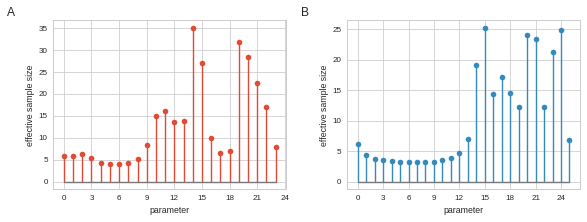

In [32]:


gridsize = (1, 2)
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))



ax1.stem(ess[:24].numpy(),linefmt='C0-',markerfmt='C0o')
#ax1.set_ylim(0,600)

ax2.stem(ess[24:].numpy(),linefmt='C1-',markerfmt='C1o')
#ax2.set_ylim(0,600)





ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.02))



ax1.set_ylabel('effective sample size')
ax1.set_xlabel('parameter')

ax2.set_ylabel('effective sample size')
ax2.set_xlabel('parameter')




plt.tight_layout(h_pad=2,w_pad=3)



xp = ax1.get_position().x0
yp = ax1.get_position().y1    
fig.text(xp - .08, yp+ .02, 'A', size=12)

xp = ax2.get_position().x0
yp = ax2.get_position().y1    
fig.text(xp - .08, yp+ .02, 'B', size=12)

#plt.savefig('../figures/ess.png', dpi=300, bbox_inches = "tight")
plt.show()


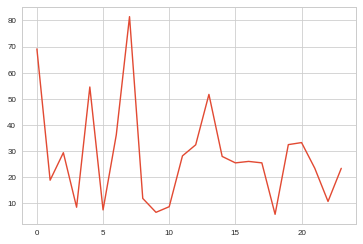

In [7]:
#plt.plot(ess[:24])
plt.plot(ess[24:])
#plt.ylim(0,20)

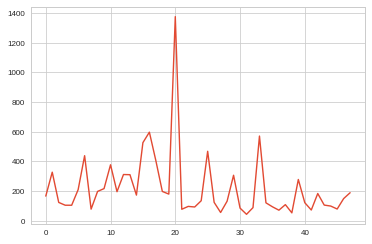

In [14]:
plt.plot(ess)
#plt.ylim(0,15)


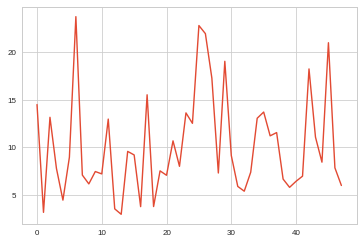

In [63]:
plt.plot(ess[:100])


In [67]:
samples = np.zeros((200,200))
for i in range(1):
    lens = np.load('../data/len_sheep_' + str(i) + '.npy')
    amps = np.load('../data/amp_sheep_' + str(i) + '.npy')
    
        

    
    samples[:,0:100] = lens[...,0]
    samples[:,100:] = amps[...,0]

In [68]:
lens.shape

(1, 100, 1)

In [426]:
ess

<tf.Tensor: id=743876, shape=(48,), dtype=float64, numpy=
array([  2.865,   4.445,  22.968,   3.803,   6.985,   6.387,  14.16 ,
        16.304,  31.595,  19.359,   4.236,  17.433,   4.256,  11.47 ,
        20.026,   7.234,  43.747,  72.895,  55.633,  12.055,   7.665,
       152.36 ,  41.452, 110.794,   3.329,  26.329,   3.067,   3.153,
         6.083,   9.225,   5.004,   2.851,   6.703,   3.109,   9.909,
         3.501,   6.215,  16.526,   9.715,  31.285,   7.869,   7.444,
         5.68 ,  15.445,  31.257,  14.584,   5.178,  17.433])>